In [59]:
# -*- coding: utf 8

from matplotlib import pyplot as plt
from scipy import stats as ss
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp as ks
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [60]:
df = pd.read_csv('EduBas_Munic.csv')
df.head()

,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_1,TxAprv_2,TxAprv_3,TxAprv_4,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP
0,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,Não,Não,Não,Sim,...,100.0,100.0,85.3,100.0,98.9,0.96,244.18,231.60,6.83,6.6
1,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,Não,Não,Não,Sim,...,100.0,100.0,85.3,100.0,98.9,0.96,244.18,231.60,6.83,6.6
2,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,100.0,100.0,99.3,100.0,100.0,1.00,255.01,241.87,7.23,7.2
3,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,98.3,100.0,100.0,99.1,97.9,0.99,238.57,232.04,6.74,6.7
4,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,99.0,100.0,99.6,99.6,99.3,0.99,249.64,238.66,7.07,7.0


In [61]:
df.columns

Index(['CodMun', 'CodMeso', 'MesoRegiao', 'NomeMun', 'UF', 'PopEst', 'Barco',
       'Metro', 'Mototx', 'Taxi', 'Trem', 'Van', 'Aviao', 'ImpacAmb_24meses',
       'Secas_Enxurr', 'PoluiAr', 'Polui_corpoAgua', 'Assorea_corpoAgua',
       'DiminVazao_corpoAgua', 'Desmatam', 'Queimad', 'Erosao_Desert',
       'Dimin_FaunaFlora', 'MoradRiscoAmb', 'FaltaSaneamen', 'Favela',
       'Cortico', 'LoteIrr', 'Ocupacao', 'AtingidoPorSeca_4a',
       'AtingPorAlagam_4a', 'AtingPorErosao_4a', 'AtingPorEnchen_4a',
       'AtingPorEnxurr_4a', 'AtingPorDeslizam_4a', 'Rede', 'TxAprv_1-5 ',
       'TxAprv_1', 'TxAprv_2', 'TxAprv_3', 'TxAprv_4', 'TxAprv_5', 'IndRend_P',
       'Mat', 'Port', 'NtMedPadr_N', 'IDEB_NxP'],
      dtype='object')

In [62]:
dfComRedes = df[df.Rede != 'Pública'] #Pois é uma junção entre as outras (Municipal, Estadual e Federal)
dfComRedes = dfComRedes[dfComRedes.IDEB_NxP != '-']
#dfComRedes['Rede']

In [63]:
df = df[df.Rede == 'Pública'] #Pois é uma junção entre as outras (Municipal, Estadual e Federal)
df = df[df.IDEB_NxP != '-'] #Pegar só municípios que tem a nota do IDEB 2017 - Total: 842
df

,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_1,TxAprv_2,TxAprv_3,TxAprv_4,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP
1,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,Não,Não,Não,Sim,...,100.0,100.0,85.3,100.0,98.9,0.96,244.18,231.60,6.83,6.6
4,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,99.0,100.0,99.6,99.6,99.3,0.99,249.64,238.66,7.07,7.0
7,3100302,3112,Zona da Mata,Abre Campo,MG,13733,Não,Não,Não,Não,...,97.7,96.2,97.3,97.4,99.5,0.98,246.48,236.46,6.97,6.8
9,3100401,3112,Zona da Mata,Acaiaca,MG,4065,Não,Não,Não,Sim,...,100.0,100.0,100.0,100.0,100.0,1.00,231.57,222.84,6.43,6.4
12,3100807,3109,Oeste de Minas,Aguanil,MG,4440,Não,Não,Não,Sim,...,100.0,100.0,100.0,100.0,100.0,1.00,267.36,247.50,7.57,7.6
15,3101102,3108,Vale do Rio Doce,Aimorés,MG,25711,Não,Não,Não,Sim,...,99.3,99.6,98.9,99.7,99.6,0.99,225.28,220.08,6.26,6.2
17,3101201,3110,Sul / Sudoeste de Minas,Aiuruoca,MG,6209,Não,Não,Não,Sim,...,93.8,94.9,77.8,92.1,89.7,0.89,252.80,245.31,7.25,6.5
19,3101300,3110,Sul / Sudoeste de Minas,Alagoa,MG,2752,Não,Não,Não,Sim,...,100.0,69.8,93.8,90.6,93.3,0.88,263.35,236.00,7.28,6.4
21,3101409,3110,Sul / Sudoeste de Minas,Albertina,MG,3046,Não,Não,Não,Sim,...,92.9,90.7,94.6,97.1,100.0,0.95,242.95,220.01,6.60,6.3
24,3101607,3110,Sul / Sudoeste de Minas,Alfenas,MG,79707,Sim,Não,Sim,Sim,...,99.6,99.7,99.2,99.5,98.4,0.99,235.56,225.68,6.56,6.5


## Var para os municípios
- Muito pequenos = MP: Até 5k
- Pequenos = P: 5001 até 20k
- Grandes = G: A partir de 85.001

In [117]:
dfMP = df[df['PopEst'] <= 5000] #215
dfP = df[(df['PopEst'] > 5000) & (df['PopEst'] <= 20000)] #440
dfG = df[df['PopEst'] > 85000] #32

In [158]:
dfG

,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_2,TxAprv_3,TxAprv_4,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP,Classe
78,3103504,3105,Triângulo Mineiro / Alto Paranaíba,Araguari,MG,117445,Não,Não,Sim,Sim,...,99.8,96.4,97.0,98.7,0.98,234.44,229.36,6.61,6.5,1
89,3104007,3105,Triângulo Mineiro / Alto Paranaíba,Araxá,MG,104283,Não,Não,Não,Sim,...,98.5,96.1,99.4,96.2,0.98,244.90,239.14,6.99,6.8,1
141,3105608,3111,Campo das Vertentes,Barbacena,MG,136689,Não,Não,Não,Sim,...,99.5,94.4,92.9,96.3,0.97,246.62,234.91,6.94,6.7,1
162,3106200,3107,Metropolitana de Belo Horizonte,Belo Horizonte,MG,2523794,Não,Sim,Não,Sim,...,98.9,93.5,98.7,98.5,0.98,233.80,226.53,6.54,6.4,1
179,3106705,3107,Metropolitana de Belo Horizonte,Betim,MG,427146,Não,Não,Não,Sim,...,99.0,89.4,99.3,92.2,0.96,228.00,221.49,6.34,6.1,1
374,3113404,3108,Vale do Rio Doce,Caratinga,MG,91841,Não,Não,Não,Sim,...,100.0,94.2,99.9,96.7,0.98,234.57,227.82,6.58,6.5,1
513,3118304,3107,Metropolitana de Belo Horizonte,Conselheiro Lafaiete,MG,127369,Não,Não,Sim,Sim,...,98.3,94.1,94.8,95.4,0.96,245.23,236.30,6.94,6.7,1
521,3118601,3107,Metropolitana de Belo Horizonte,Contagem,MG,658580,Não,Sim,Não,Sim,...,98.8,91.3,99.1,98.5,0.97,227.08,222.10,6.34,6.2,1
544,3119401,3108,Vale do Rio Doce,Coronel Fabriciano,MG,110326,Não,Não,Sim,Sim,...,99.5,95.1,99.3,98.6,0.98,229.83,221.67,6.38,6.3,1
636,3122306,3109,Oeste de Minas,Divinópolis,MG,234937,Não,Não,Sim,Sim,...,99.8,95.2,99.8,96.4,0.98,248.54,241.54,7.10,7.0,1


In [119]:
Notas = []
Notas = ['IDEB_NxP', 'Mat', 'Port']

In [120]:
Notas_MP = []
Notas_P = []
Notas_G = []

Notas_Min = np.zeros(3)
Notas_Max = np.zeros(3)
Notas_Mean = np.zeros(3)
Notas_Median = np.zeros(3)

#Notas_MP = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#Notas_P = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#Notas_G = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#print(Notas_MP)

In [121]:
##Sobre Municípios muito pequenos
i = 0

while (i < 3):
    Notas_Min[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
    
Notas_MP = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#print(Notas_MP)

In [122]:
dic_Notas_MP = {'MinMP': Notas_MP[0], 'MaxMP': Notas_MP[1], 'MeanMP': Notas_MP[2], 'MedianMP': Notas_MP[3]}
df_NotasMP = pd.DataFrame(data=dic_Notas_MP)
df_NotasMP.index = [Notas]
#df_NotasMP

In [123]:
##Sobre Municípios pequenos
i = 0

while (i < 3):
    Notas_Min[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
Notas_P = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]    
#print(Notas_P)

In [124]:
dic_Notas_P = {'MinP': Notas_P[0], 'MaxP': Notas_P[1], 'MeanP': Notas_P[2], 'MedianP': Notas_P[3]}
df_NotasP = pd.DataFrame(data=dic_Notas_P)
df_NotasP.index = [Notas]
#df_NotasP

In [125]:
##Sobre Municípios grandes
i = 0

while (i < 3):
    Notas_Min[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
Notas_G = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]    
#print(Notas_G)

In [126]:
dic_Notas_G = {'MinG': Notas_G[0], 'MaxG': Notas_G[1], 'MeanG': Notas_G[2], 'MedianG': Notas_G[3]}
df_NotasG = pd.DataFrame(data=dic_Notas_G)
df_NotasG.index = [Notas]
#df_NotasG

In [127]:
df_Notas = df_NotasMP.set_index(df_NotasMP.index).join(df_NotasP.set_index(df_NotasP.index)).join(df_NotasG.set_index(df_NotasG.index))
df_Notas

,MinMP,MaxMP,MeanMP,MedianMP,MinP,MaxP,MeanP,MedianP,MinG,MaxG,MeanG,MedianG
IDEB_NxP,3.70,8.00,6.255814,6.20,4.40,8.10,6.262273,6.300,5.60,7.40,6.430233,6.40
Mat,192.53,291.45,232.959907,231.27,183.59,286.16,231.307000,231.820,212.62,258.79,234.899070,234.51
Port,180.18,269.35,221.966930,220.98,171.41,265.81,220.499136,221.165,208.99,248.19,227.789302,227.74


# PDF ideb para dfMP, dfP e dfG
A função densidade (PDF) pode ser compreendia
como uma extensão natural do histograma.

In [128]:
#Plotar gráficos e ir salvando

Text(0.5, 0.98, 'Municipios Grandes')

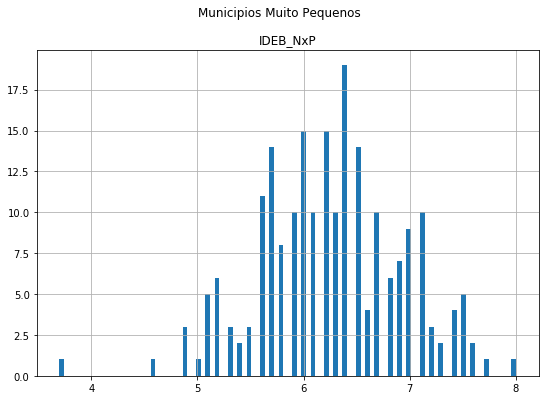

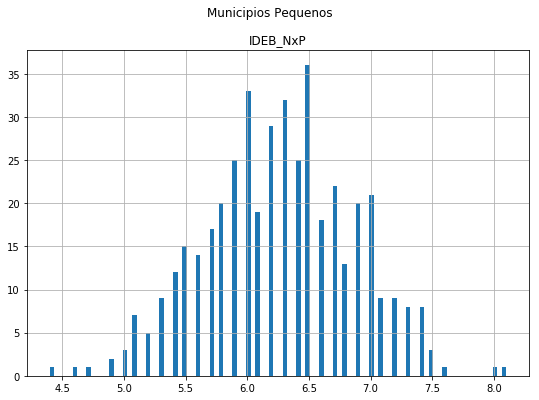

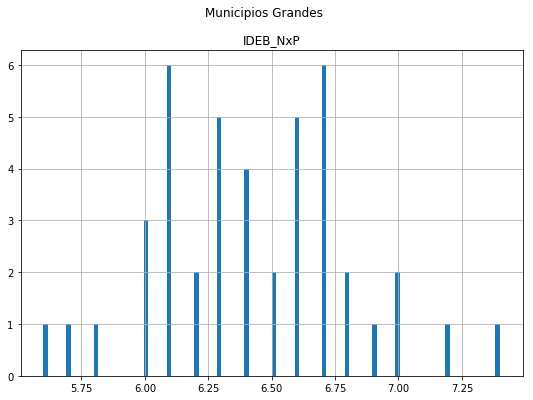

In [129]:
dfMP.loc[:,'IDEB_NxP'] = dfMP['IDEB_NxP'].astype(np.float)
dfP.loc[:,'IDEB_NxP'] = dfP['IDEB_NxP'].astype(np.float)
dfG.loc[:,'IDEB_NxP'] = dfG['IDEB_NxP'].astype(np.float)

dfMP.hist(column='IDEB_NxP', bins=100)
plt.suptitle("Municipios Muito Pequenos")

dfP.hist(column='IDEB_NxP', bins=100)
plt.suptitle("Municipios Pequenos")

dfG.hist(column='IDEB_NxP', bins=100)
plt.suptitle("Municipios Grandes")

# CDF ideb para dfMP, dfP e dfG

In [130]:
dfMP.loc[:,'IDEB_NxP'] = dfMP['IDEB_NxP'].astype(np.float)
dfP.loc[:,'IDEB_NxP'] = dfP['IDEB_NxP'].astype(np.float)
dfG.loc[:,'IDEB_NxP'] = dfG['IDEB_NxP'].astype(np.float)

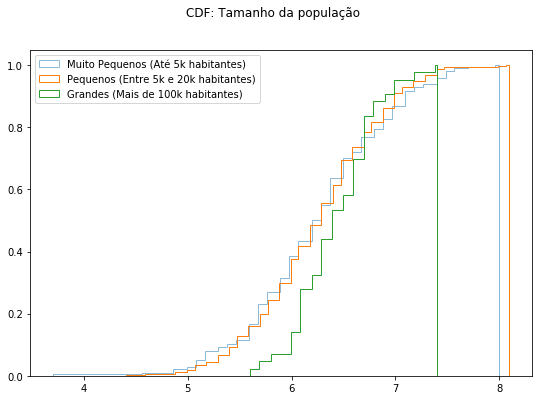

In [131]:
plt.rcParams['figure.figsize'] = (9,6)
plt.hist(dfMP['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', alpha=0.5, label='Muito Pequenos (Até 5k habitantes)')
plt.hist(dfP['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Pequenos (Entre 5k e 20k habitantes)')
plt.hist(dfG['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Grandes (Mais de 100k habitantes)')

plt.suptitle("CDF: Tamanho da população")
plt.legend(loc='upper left')
plt.show()

# Testes de hipóteses

In [132]:
# Ver sobre Teste de Kolmogorov
# https://pt.wikipedia.org/wiki/Teste_Kolmogorov-Smirnov
# http://www.portalaction.com.br/inferencia/62-teste-de-kolmogorov-smirnov

In [133]:
mp = dfMP['IDEB_NxP'].values
p = dfP['IDEB_NxP'].values
g = dfG['IDEB_NxP'].values
#print(x)
r1 = ks(mp, p)
r2 = ks(mp, g)
r3 = ks(p, g)

print('MP x P: ', r1)
print('MP x G: ', r2)
print('P x G: ', r3)

# Considerando nível de significância a=0,05 e o comparando com pvalue:
# Se pvalue < a então muito provavelmente as distribuições são diferentes
# Logo MP e P são considerados com distribuição iguais e os demais com diferentes.

MP x P:  Ks_2sampResult(statistic=0.039323467230444, pvalue=0.9764680191647914)
MP x G:  Ks_2sampResult(statistic=0.24651162790697675, pvalue=0.020951102697180684)
P x G:  Ks_2sampResult(statistic=0.23546511627906977, pvalue=0.021416674951976983)



# Estatísticas considerando as 12 Meso regiões
Triângulo Mineiro / Alto Paranaíba, Central Mineira, Zona da Mata, Oeste de Minas, Vale do Rio Doce, Sul / Sudoeste de Minas, Campo das Vertentes, Jequitinhonha, Metropolitana de Belo Horizonte, Noroeste de Minas, Vale do Mucuri, Norte de Minas


In [134]:
#dfMesoregioes = df['MesoRegiao'].drop_duplicates(keep = 'first', inplace = True)
#df['MesoRegiao']
#dfMesoregioes

df[Notas[0]] = df[Notas[0]].astype(float)
df[Notas[1]] = df[Notas[1]].astype(float)
df[Notas[2]] = df[Notas[2]].astype(float)

dfComRedes[Notas[0]] = dfComRedes[Notas[0]].astype(float)
dfComRedes[Notas[1]] = dfComRedes[Notas[1]].astype(float)
dfComRedes[Notas[2]] = dfComRedes[Notas[2]].astype(float)

In [135]:
mesoReg = ['Triângulo Mineiro / Alto Paranaíba', 'Central Mineira', 'Zona da Mata', 'Oeste de Minas', 'Vale do Rio Doce', 'Sul / Sudoeste de Minas', 'Campo das Vertentes', 'Jequitinhonha', 'Metropolitana de Belo Horizonte', 'Noroeste de Minas', 'Vale do Mucuri', 'Norte de Minas']
#mesoReg

In [136]:
#dfVetMeso = np.zeros(12)
#idx = 0

#for idx, m in enumerate(mesoReg):
    #dfVetMeso[idx] = df[df['MesoRegiao'] == m]
    #print (idx, m)

#dfVetMeso

In [137]:
dfMeso1 = df[df['MesoRegiao'] == 'Triângulo Mineiro / Alto Paranaíba']
dfMeso2 = df[df['MesoRegiao'] == 'Central Mineira']
dfMeso3 = df[df['MesoRegiao'] == 'Zona da Mata']
dfMeso4 = df[df['MesoRegiao'] == 'Oeste de Minas']
dfMeso5 = df[df['MesoRegiao'] == 'Vale do Rio Doce']
dfMeso6 = df[df['MesoRegiao'] == 'Sul / Sudoeste de Minas']
dfMeso7 = df[df['MesoRegiao'] == 'Campo das Vertentes']
dfMeso8 = df[df['MesoRegiao'] == 'Jequitinhonha']
dfMeso9 = df[df['MesoRegiao'] == 'Metropolitana de Belo Horizonte']
dfMeso10 = df[df['MesoRegiao'] == 'Noroeste de Minas']
dfMeso11 = df[df['MesoRegiao'] == 'Vale do Mucuri']
dfMeso12 = df[df['MesoRegiao'] == 'Norte de Minas']

In [138]:
meso = df.groupby('MesoRegiao')[["Mat", "Port", "IDEB_NxP"]]
meso_mean = meso.mean()
meso_mean

,Mat,Port,IDEB_NxP
MesoRegiao,,,
Campo das Vertentes,239.761944,226.391667,6.511111
Central Mineira,238.178276,227.278276,6.565517
Jequitinhonha,223.354510,213.430392,6.027451
Metropolitana de Belo Horizonte,233.695437,224.117670,6.333010
Noroeste de Minas,231.655789,220.976842,6.373684
Norte de Minas,218.334494,209.949888,5.906742
Oeste de Minas,245.313250,234.260250,6.837500
Sul / Sudoeste de Minas,243.703862,232.151931,6.655862
Triângulo Mineiro / Alto Paranaíba,232.440909,224.436970,6.315152


In [139]:
#meso.min() 

In [140]:
#meso.max()
#meso.count()

In [141]:
#meso_median = meso.median() 
#meso_median

# PDF considerando as Meso regiões

In [142]:
#Plotar gráficos e ir salvando

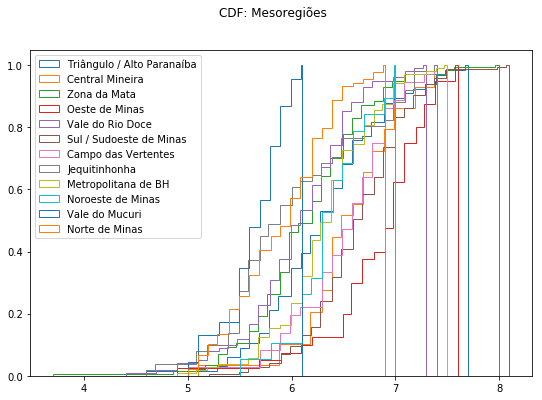

In [143]:
#Ver as cores muito parecidas
plt.rcParams['figure.figsize'] = (9,6)
plt.hist(dfMeso1['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Triângulo / Alto Paranaíba')
plt.hist(dfMeso2['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Central Mineira')
plt.hist(dfMeso3['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Zona da Mata')
plt.hist(dfMeso4['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Oeste de Minas')
plt.hist(dfMeso5['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Vale do Rio Doce')
plt.hist(dfMeso6['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Sul / Sudoeste de Minas')
plt.hist(dfMeso7['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Campo das Vertentes')
plt.hist(dfMeso8['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Jequitinhonha')
plt.hist(dfMeso9['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Metropolitana de BH')
plt.hist(dfMeso10['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Noroeste de Minas')
plt.hist(dfMeso11['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Vale do Mucuri')
plt.hist(dfMeso12['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Norte de Minas')

plt.suptitle("CDF: Mesoregiões")
plt.legend(loc='upper left')
plt.show()

# Testes de hipóteses considerando as Meso regiões

In [144]:
# Testar para Vale do Mucuri com Metropolitana de BH; Vale do Mucuri com Sul; Sul com Norte
vm = dfMeso11['IDEB_NxP'].values # Vale do Mucuri
mbh = dfMeso9['IDEB_NxP'].values # Região Metropolitana de BH
s = dfMeso6['IDEB_NxP'].values # Sul / Sudoeste de Minas
n = dfMeso12['IDEB_NxP'].values # Norte de Minas

r4 = ks(vm, mbh)
r5 = ks(vm, s)
r6 = ks(s, n)

print('Mucuri x Metropolitana BH: ', r4)
print('Mucuri x  Sul/Sudoeste Minas: ', r5)
print('Sul/Sudoeste Minas x Norte Minas: ', r6)

# Considerando nível de significância a=0,05 e o comparando com pvalue:
# Se pvalue < a então muito provavelmente as distribuições testadas são diferentes

Mucuri x Metropolitana BH:  Ks_2sampResult(statistic=0.7235120303925707, pvalue=1.4774749567173586e-09)
Mucuri x  Sul/Sudoeste Minas:  Ks_2sampResult(statistic=0.8689655172413793, pvalue=2.641350293559844e-14)
Sul/Sudoeste Minas x Norte Minas:  Ks_2sampResult(statistic=0.6054242541650523, pvalue=1.2581276450581352e-18)


# Estatísticas considerando redes de escola
Estadual, Municipal e Federal

In [145]:
dfEstadual = dfComRedes[dfComRedes['Rede'] == 'Estadual'] #422
dfFederal = dfComRedes[dfComRedes['Rede'] == 'Federal'] #3
dfMunicipal = dfComRedes[dfComRedes['Rede'] == 'Municipal'] #760

redes = dfComRedes.groupby('Rede')[["Mat", "Port", "IDEB_NxP"]]
redes_mean = redes.mean()
redes_mean

,Mat,Port,IDEB_NxP
Rede,,,
Estadual,230.365498,221.213199,6.349763
Federal,262.250000,250.850000,7.300000
Municipal,231.349868,221.180500,6.234605


In [146]:
#redes.min()

In [147]:
#redes.max()

In [148]:
#redes.median()

In [149]:
dfEstadual.loc[:,'IDEB_NxP'] = dfEstadual['IDEB_NxP'].astype(np.float)
dfFederal.loc[:,'IDEB_NxP'] = dfFederal['IDEB_NxP'].astype(np.float)
dfMunicipal.loc[:,'IDEB_NxP'] = dfMunicipal['IDEB_NxP'].astype(np.float)

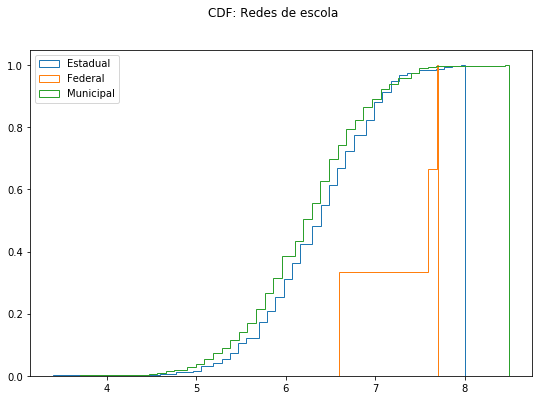

In [150]:
plt.rcParams['figure.figsize'] = (9,6)
plt.hist(dfEstadual['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Estadual')
plt.hist(dfFederal['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Federal')
plt.hist(dfMunicipal['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Municipal')

plt.suptitle("CDF: Redes de escola")
plt.legend(loc='upper left')
plt.show()

# Testes de hipóteses considerando as redes de escola

In [151]:
# Testar para Vale do Mucuri com Metropolitana de BH; Vale do Mucuri com Sul; Sul com Norte
est = dfEstadual['IDEB_NxP'].values # Vale do Mucuri
mun = dfMunicipal['IDEB_NxP'].values # Região Metropolitana de BH

r7 = ks(est, mun)

print('Estadual x Municipal: ', r7)

# Considerando nível de significância a=0,05 e o comparando com pvalue:
# Se pvalue < a então muito provavelmente as distribuições testadas são diferentes

Estadual x Municipal:  Ks_2sampResult(statistic=0.08362434522324769, pvalue=0.042409292710769944)


# Regressão Linear

# Classificação utilizando KNN

In [152]:
# Classificar municípios
# ptMedioClasse: Ponto médio: média da (soma do valor máximo e o valor mínimo)
# Classes: abaixo de ptMedioClasse ou acima/igual a ptMedioClasse

maxIDEB = df['IDEB_NxP'].max()
minIDEB = df['IDEB_NxP'].min()
ptMedioClasse = (maxIDEB + minIDEB)/2
#print(maxIDEB)
#print(minIDEB)
#print(ptMedioClasse)

df['Classe'] = 0 #0 = Abaixo do ponto médio
df['Classe'][df['IDEB_NxP'] >= ptMedioClasse] = 1 #1 = Acima do ponto médio
df.head()

/home/jessicatcr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_2,TxAprv_3,TxAprv_4,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP,Classe
1,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,Não,Não,Não,Sim,...,100.0,85.3,100.0,98.9,0.96,244.18,231.60,6.83,6.6,1
4,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,100.0,99.6,99.6,99.3,0.99,249.64,238.66,7.07,7.0,1
7,3100302,3112,Zona da Mata,Abre Campo,MG,13733,Não,Não,Não,Não,...,96.2,97.3,97.4,99.5,0.98,246.48,236.46,6.97,6.8,1
9,3100401,3112,Zona da Mata,Acaiaca,MG,4065,Não,Não,Não,Sim,...,100.0,100.0,100.0,100.0,1.00,231.57,222.84,6.43,6.4,1
12,3100807,3109,Oeste de Minas,Aguanil,MG,4440,Não,Não,Não,Sim,...,100.0,100.0,100.0,100.0,1.00,267.36,247.50,7.57,7.6,1


In [157]:
# Atributos: mesorregião, gasto por aluno, população.
x = np.array(df[['CodMeso', 'PopEst']])
y = np.array(df['Classe'])

#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

modeloKNN = KNeighborsClassifier(n_neighbors=1).fit(x_treino, y_treino)
modeloKNN.predict(x_teste)

print('y real: ', y_teste)
print('y previsto: ', modeloKNN.predict(x_teste))
print(classification_report(y_teste, modeloKNN.predict(x_teste)))

y real:  [1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0]
y previsto:  [0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1